In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Logistic Regression Results

In [5]:
filter_chi2_lr_results = pd.read_csv('./filter-methods/chi2/logistic-regression/results.08.21.2019-09:11:04.csv')

In [6]:
print('Maximum ROC AUC scored with levels:')
filter_chi2_lr_results.loc[filter_chi2_lr_results['roc_auc'].idxmax()]

Maximum ROC AUC scored with levels:


index            184.000000
subset_size       60.000000
minority_size      0.288900
run                4.000000
roc_auc            0.813686
time_elapsed       6.230673
Name: 184, dtype: float64

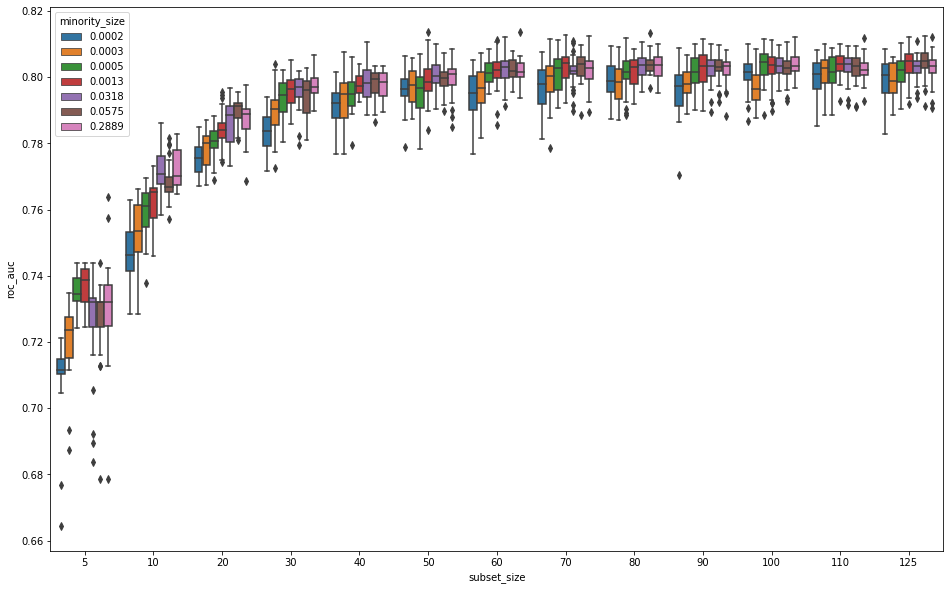

In [7]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=filter_chi2_lr_results, x='subset_size', y='roc_auc', hue='minority_size')

### How Many Features Are Actually Necessary?

In [15]:
pd.set_option('display.max_rows', 500)
filter_chi2_lr_results.groupby(by=['subset_size']).roc_auc.describe()

,count,mean,std,min,25%,50%,75%,max
subset_size,,,,,,,,
5,210.0,0.726986,0.014073,0.664360,0.721367,0.732017,0.735476,0.763940
10,210.0,0.761813,0.011634,0.728512,0.754285,0.765061,0.769312,0.786218
20,210.0,0.783135,0.007164,0.767166,0.778639,0.783576,0.789113,0.797644
30,210.0,0.792828,0.007061,0.771734,0.789047,0.794241,0.798077,0.806762
40,210.0,0.795929,0.005980,0.776804,0.792993,0.796853,0.800176,0.810788
50,210.0,0.798223,0.005778,0.778211,0.794721,0.798934,0.801933,0.813661
60,210.0,0.800050,0.005835,0.776855,0.797350,0.800772,0.804059,0.813686
70,210.0,0.801174,0.005747,0.778742,0.798527,0.802235,0.805238,0.812758
80,210.0,0.801479,0.005328,0.787049,0.798115,0.802062,0.805034,0.813463


Selecting 50 features as approximate cutoff (mean auc > 0.80)

In [18]:
groups = filter_chi2_lr_results[filter_chi2_lr_results.subset_size > 50].groupby(by=['subset_size', 'minority_size'])

In [19]:
groups.roc_auc.describe()

count      mean       std       min       25%  \
subset_size minority_size                                                  
60          0.0002          30.0  0.794271  0.006927  0.776855  0.789998   
            0.0003          30.0  0.796455  0.006032  0.781771  0.792308   
            0.0005          30.0  0.801285  0.003603  0.794837  0.798620   
            0.0013          30.0  0.801752  0.005548  0.785571  0.799935   
            0.0318          30.0  0.802242  0.004969  0.791228  0.799768   
            0.0575          30.0  0.802307  0.003252  0.795696  0.800236   
            0.2889          30.0  0.802039  0.003893  0.793748  0.800040   
70          0.0002          30.0  0.797047  0.006946  0.781300  0.791814   
            0.0003          30.0  0.799391  0.006841  0.778742  0.795503   
            0.0005          30.0  0.801248  0.005547  0.790862  0.796267   
            0.0013          30.0  0.803109  0.004549  0.792381  0.799910   
            0.0318          30.0  0.801755  0.004589  0.789927  0.800884   
            0.0575          30.0  0.803455  0.004301  0.788676  0.800510   
            0.2889          30.0  0.802212  0.004509  0.789661  0.799417   
80          0.0002          30.0  0.798662  0.005708  0.787283  0.795495   
            0.0003          30.0  0.798415  0.006235  0.787049  0.793517   
            0.0005          30.0  0.801246  0.006087  0.788593  0.799473   
            0.0013          30.0  0.801801  0.004898  0.791884  0.798119   
            0.0318          30.0  0.802985  0.003985  0.795436  0.800628   
            0.0575          30.0  0.803890  0.003119  0.796837  0.802014   
            0.2889          30.0  0.803353  0.004054  0.795350  0.800542   
90          0.0002          30.0  0.796724  0.008128  0.770444  0.791307   
            0.0003          30.0  0.798214  0.004943  0.789048  0.795192   
            0.0005          30.0  0.801702  0.005028  0.790237  0.798414   
            0.0013          30.0  0.802702  0.005536  0.789776  0.798567   
            0.0318          30.0  0.802485  0.004443  0.789502  0.800416   
            0.0575          30.0  0.802770  0.004256  0.792526  0.801956   
            0.2889          30.0  0.802167  0.004262  0.788349  0.800842   
100         0.0002          30.0  0.801134  0.005302  0.786814  0.799060   
            0.0003          30.0  0.797190  0.005778  0.787838  0.793156   
            0.0005          30.0  0.803491  0.004837  0.788668  0.800559   
            0.0013          30.0  0.802615  0.005592  0.789897  0.800903   
            0.0318          30.0  0.803547  0.003852  0.795769  0.801214   
            0.0575          30.0  0.802498  0.004056  0.792813  0.800902   
            0.2889          30.0  0.803888  0.003503  0.796832  0.801926   
110         0.0002          30.0  0.799762  0.005471  0.785365  0.796551   
            0.0003          30.0  0.801311  0.005528  0.788492  0.798393   
            0.0005          30.0  0.801511  0.005188  0.788744  0.798388   
            0.0013          30.0  0.803829  0.003757  0.792912  0.801811   
            0.0318          30.0  0.803243  0.004188  0.791723  0.801610   
            0.0575          30.0  0.802749  0.004415  0.791066  0.800525   
            0.2889          30.0  0.802482  0.003761  0.792936  0.800789   
125         0.0002          30.0  0.798629  0.006899  0.782867  0.795248   
            0.0003          30.0  0.798821  0.005054  0.788671  0.795142   
            0.0005          30.0  0.801348  0.005141  0.790535  0.798647   
            0.0013          30.0  0.803858  0.004873  0.791841  0.801202   
            0.0318          30.0  0.802852  0.003648  0.793700  0.801258   
            0.0575          30.0  0.804648  0.004464  0.791229  0.802946   
            0.2889          30.0  0.802877  0.004646  0.790649  0.801264   

                                50%       75%       max  
subset_size minority_size                                
60          0.0002         0.79520

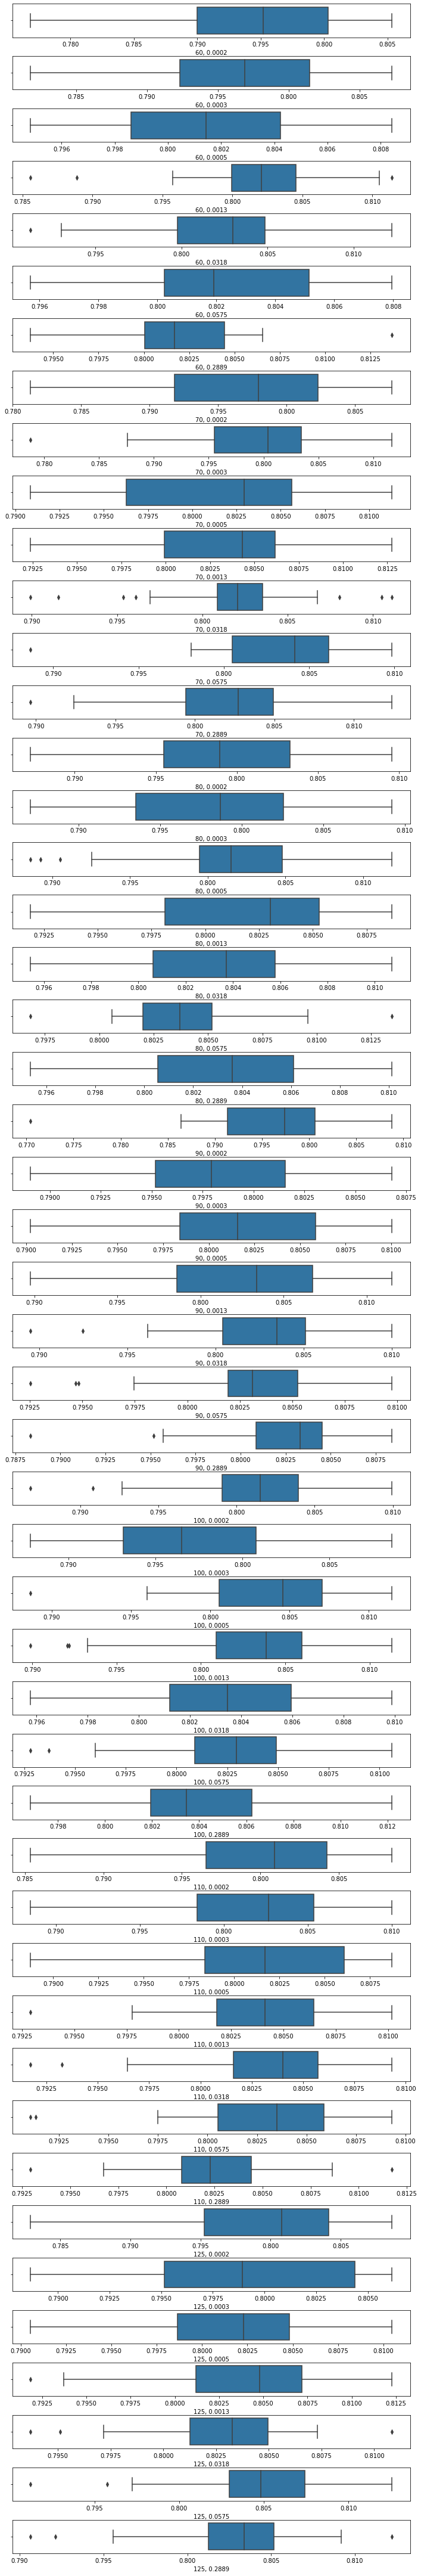

In [99]:
%matplotlib inline
fig, axes = plt.subplots(len(groups), figsize=(10,60))
fig.tight_layout()
counter = 0
for (subset_size, minority_size), df in groups:
    label = f'{subset_size}, {minority_size}'
    sns.boxplot(data=df, y='roc_auc', ax=axes[counter], orient='h')\
        .set(xlabel=label, ylabel='')
    counter += 1